# Problem 14.4

**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual**

**Problem 14.4**


**Determine the dominant frequencies for solar PV and wind power fluctuations by calculating the Fast Fourier Transform (FFT) of the solar PV and wind power time series corresponding to the country in Problem 14.3 and plotting the power spectra.**

We downloaded solar PV and wind time series for Spain from https://model.energy/ and saved it in the data folder.

We will use the packages [pandas](https://pandas.org/), [numpy](https://numpy.org/), and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import matplotlib.gridspec as gridspec

First, we retrieve the time series. 

In [2]:
CF=pd.read_csv('data/time-series-SPAIN.csv',
                  sep=',', index_col=0)
CF.head()

,onwind,solar
2011-01-01 00:00:00,0.021,0.0
2011-01-01 01:00:00,0.021,0.0
2011-01-01 02:00:00,0.020,0.0
2011-01-01 03:00:00,0.018,0.0
2011-01-01 04:00:00,0.016,0.0


We calculate the Fast Fourier Transform (FFT) of the solar PV capacity factor time series. 

The function fft.fft() is used to calculate the Fast Fourier Transform $a_{\omega}=\int^T_0 X(t) e^{i \omega t}dt$ where $X(t)$ is the time series (wind or solar) that we are analyzing.

The power spectra $\| a_{\omega}\|^2$ is plotted to identify the dominant frequencies.

In [3]:
t_sampling=1 # sampling rate, 1 data per hour
x = np.arange(1,8761, t_sampling) 
y = CF['solar']
n = len(x)
y_fft = np.fft.fft(y)/n #n for normalization    
frq = np.arange(0,1/t_sampling,1/(t_sampling*n))        
period = np.array([1/f for f in frq])  

C:\Users\34620\AppData\Local\Temp\ipykernel_19252\3966920429.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  period = np.array([1/f for f in frq])


We plot the power spectra for solar CF time series.

Text(740, 0.95, 'month')

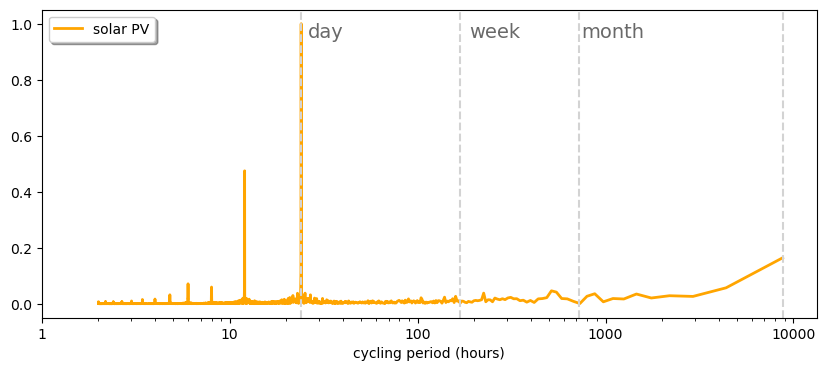

In [4]:
plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
ax0.semilogx(period[1:n//2],
             abs(y_fft[1:n//2])/np.max(abs(y_fft[1:n//2])), 
             color='orange',
             linewidth=2, label='solar PV')  
ax0.legend(loc='best', shadow=True, fancybox=True)
ax0.set_xticks([1, 10, 100, 1000, 10000])
ax0.set_xticklabels(['1', '10', '100', '1000', '10000'])
ax0.set_xlabel('cycling period (hours)')

#We add lines indicating day, week, month 
plt.axvline(x=24, color='lightgrey', linestyle='--')
plt.axvline(x=24*7, color='lightgrey', linestyle='--')
plt.axvline(x=24*30, color='lightgrey', linestyle='--')
plt.axvline(x=8760, color='lightgrey', linestyle='--') 
plt.text(26, 0.95, 'day', horizontalalignment='left', color='dimgrey', fontsize=14)
plt.text(24*7+20, 0.95, 'week', horizontalalignment='left', color='dimgrey', fontsize=14)
plt.text(24*30+20, 0.95, 'month', horizontalalignment='left', color='dimgrey', fontsize=14)

We calculate the Fast Fourier Transform (FFT) of the onshore wind capacity factor time series. 

In [5]:
t_sampling=1 # sampling rate, 1 data per hour
x = np.arange(1,8761, t_sampling) 
y = CF['onwind']
n = len(x)
y_fft=np.fft.fft(y)/n #n for normalization    
frq=np.arange(0,1/t_sampling,1/(t_sampling*n))        
period=np.array([1/f for f in frq])  

C:\Users\34620\AppData\Local\Temp\ipykernel_19252\3476916205.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  period=np.array([1/f for f in frq])


We plot the power spectra for onshore wind CF time series.

Text(740, 0.95, 'month')

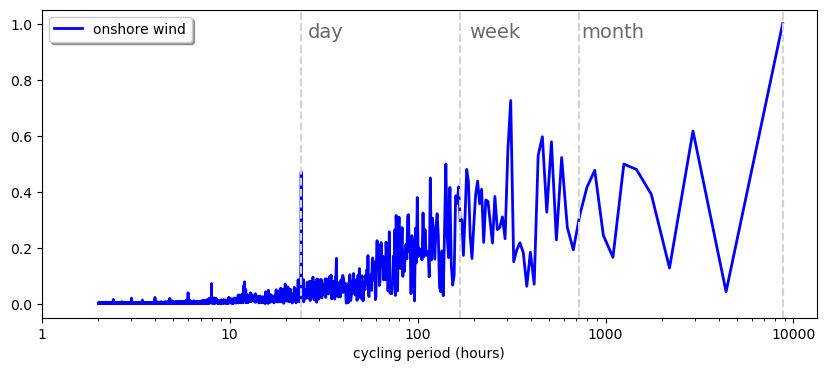

In [6]:
plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
ax0.semilogx(period[1:n//2],
             abs(y_fft[1:n//2])/np.max(abs(y_fft[1:n//2])), 
             color='blue',
             linewidth=2, label='onshore wind')  
ax0.legend(loc='best', shadow=True, fancybox=True)
ax0.set_xticks([1, 10, 100, 1000, 10000])
ax0.set_xticklabels(['1', '10', '100', '1000', '10000'])
ax0.set_xlabel('cycling period (hours)')

#We add lines indicating day, week, month 
plt.axvline(x=24, color='lightgrey', linestyle='--')
plt.axvline(x=24*7, color='lightgrey', linestyle='--')
plt.axvline(x=24*30, color='lightgrey', linestyle='--')
plt.axvline(x=8760, color='lightgrey', linestyle='--') 
plt.text(26, 0.95, 'day', horizontalalignment='left', color='dimgrey', fontsize=14)
plt.text(24*7+20, 0.95, 'week', horizontalalignment='left', color='dimgrey', fontsize=14)
plt.text(24*30+20, 0.95, 'month', horizontalalignment='left', color='dimgrey', fontsize=14)

Solar PV main fluctuations show a daily cycle, while onshore wind shows significant fluctuations in the synoptic timescale (with a frequency of around one week)